In [24]:
#Import libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import statsmodels.api as sm
from scipy import stats


# Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

### **Attribute Information**

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
#Read dataset
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# import pandas_profiling
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file="report_prfile.html")


In [5]:
#Tabla de frecuencias
tabla_frec = df['Sex'].value_counts()
tabla_frec

M    725
F    193
Name: Sex, dtype: int64

In [6]:
#Tabla de frecuencias relativa (funciona con porcentajes)
tabla_frec_rel = (df['Sex'].value_counts() / len(df['Sex']))*100
tabla_frec_rel

M    78.976035
F    21.023965
Name: Sex, dtype: float64

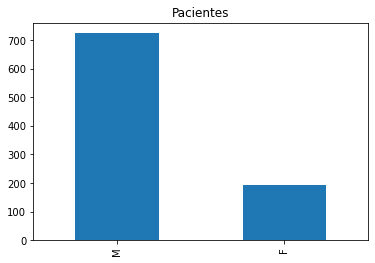

In [7]:
tabla_frec.plot(kind ='bar', title='Pacientes')
plt.show()

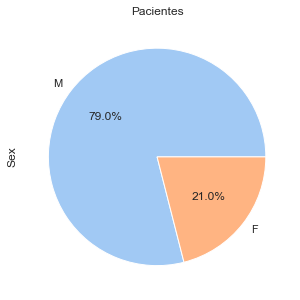

In [54]:
tabla_frec_rel.plot(kind='pie', title='Pacientes', autopct='%.1f%%', figsize=(5,5))
plt.show()

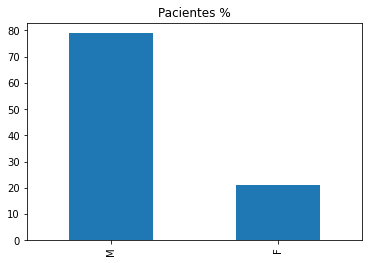

In [8]:
tabla_frec_rel.plot(kind ='bar', title='Pacientes %')
plt.show()

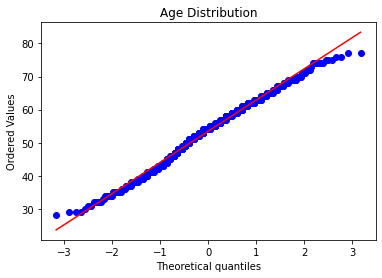

In [26]:
#Check if variable age has a normal distribution
stats.probplot(x=df['Age'], dist = "norm", plot = plt)
plt.title("Age Distribution")
plt.show()

C:\Users\Cristian.Correa\anaconda3\envs\rappi\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma de Age')

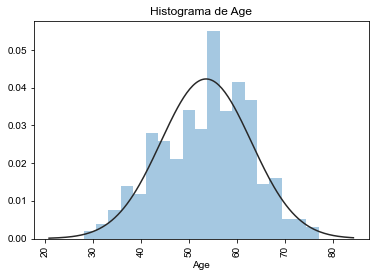

In [27]:
#Age Distribution
sns.distplot(df['Age'],fit=stats.norm, kde=False)
sns.set(color_codes=True)
plt.xticks(rotation=90)
plt.title("Histograma de Age")

In [90]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_num,ChestPainType_num,RestingECG_num,ExerciseAngina_num,ST_Slope_num
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,2,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2,1,0,2


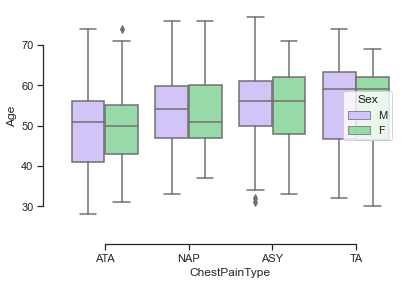

In [94]:
#Barplot chart by ChestPaint Type
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="ChestPainType", y="Age",
            hue="Sex", palette=["m", "g"],
            data=df)

sns.despine(offset=20, trim=True)

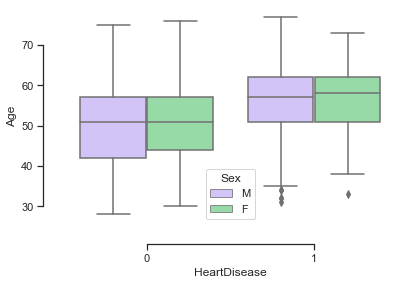

In [93]:
#Barplot chart by ChestPaint Type
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="HeartDisease", y="Age",
            hue="Sex", palette=["m", "g"],
            data=df)

sns.despine(offset=20, trim=True)

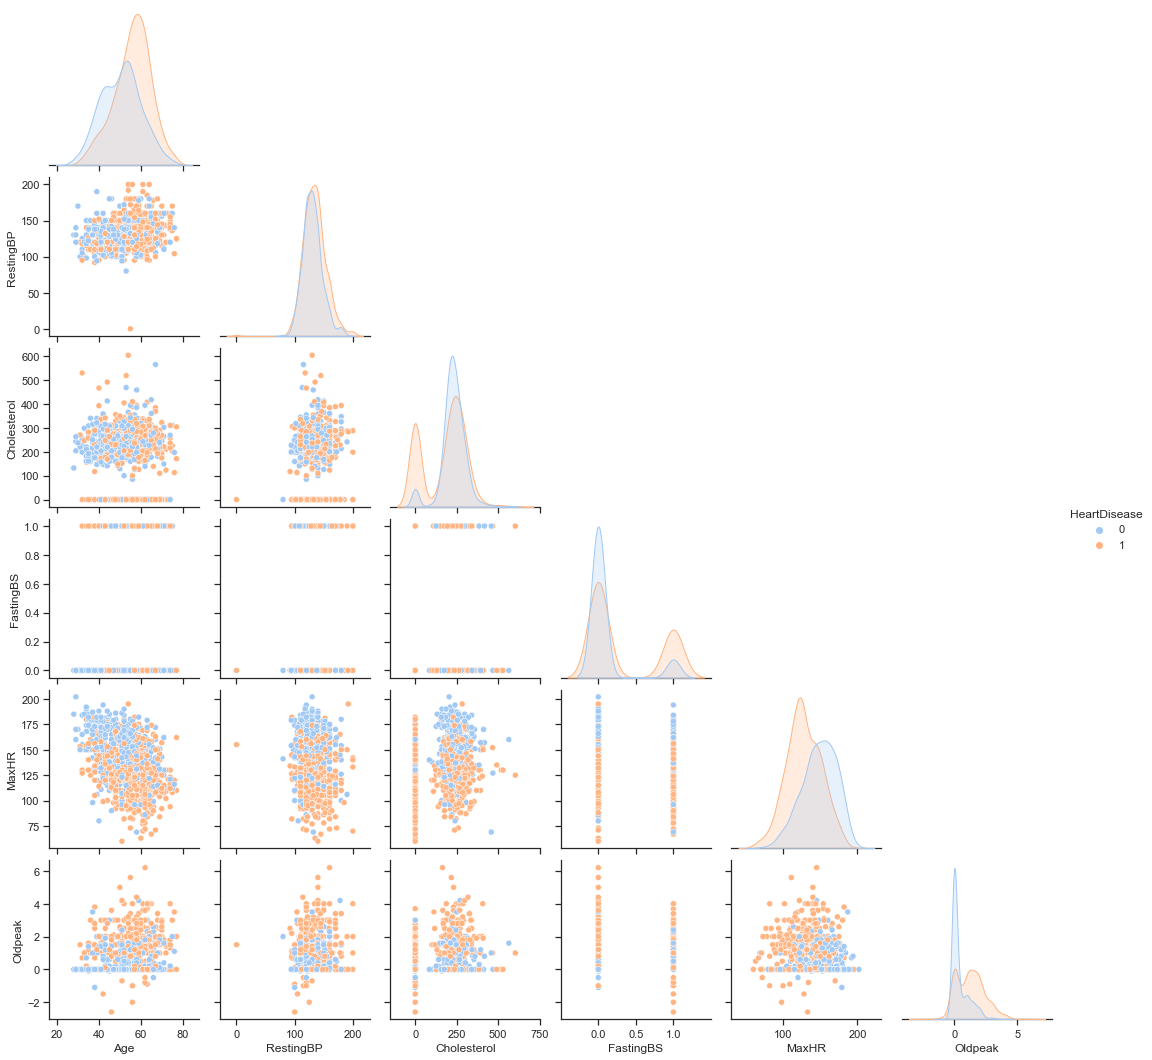

In [53]:
#Pair Plot density and correlation
sns.pairplot(df,hue='HeartDisease' , corner = True)
plt.show()

In [55]:
print('\033[1m'+'Mediana\n'+'\033[0m')
print(df.median())
print()
print('\033[1m'+'Media\n'+'\033[0m')
print(df.mean())
print()
print('\033[1m'+'Moda\n'+'\033[0m')
print(df.mode())

Mediana

Age              54.0
RestingBP       130.0
Cholesterol     223.0
FastingBS         0.0
MaxHR           138.0
Oldpeak           0.6
HeartDisease      1.0
dtype: float64

Media

Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64

Moda

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   54   M           ASY        120            0          0     Normal    150   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0     Flat             1  


In [59]:
print('\033[1m'+'Varianza\n'+'\033[0m')
print(df.var())
print()
print('\033[1m'+'Desviación\n'+'\033[0m')
print(df.std())

Varianza

Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64

Desviación

Age               9.432617
RestingBP        18.514154
Cholesterol     109.384145
FastingBS         0.423046
MaxHR            25.460334
Oldpeak           1.066570
HeartDisease      0.497414
dtype: float64


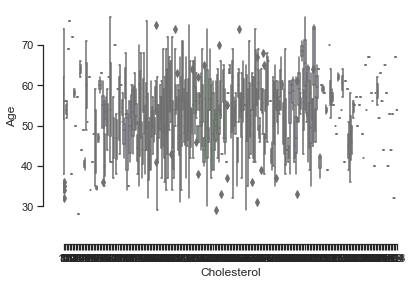

In [66]:
#Barplot chart by ChestPaint Type
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="Cholesterol", y="Age",  palette=["m", "g"],
            data=df)

sns.despine(offset=20, trim=True)

In [64]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [67]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [68]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [70]:
#Group by chestType and gender
df.groupby(by= ['ChestPainType','Sex']).size()

ChestPainType  Sex
ASY            F       70
               M      426
ATA            F       60
               M      113
NAP            F       53
               M      150
TA             F       10
               M       36
dtype: int64

In [71]:
#Empty and missing values
df.isna().sum()
df.isna().sum().sort_values(ascending=False)

HeartDisease      0
ST_Slope          0
Oldpeak           0
ExerciseAngina    0
MaxHR             0
RestingECG        0
FastingBS         0
Cholesterol       0
RestingBP         0
ChestPainType     0
Sex               0
Age               0
dtype: int64

In [72]:
df.duplicated(subset = df.columns, keep=False).sum()

0

In [120]:
#Cuántas categorías tiene ChestPainType
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [121]:
#Encode category variables
df['Sex_num'] = df['Sex'].astype('category').cat.codes
df['ChestPainType_num'] = df['ChestPainType'].astype('category').cat.codes
df['RestingECG_num'] = df['RestingECG'].astype('category').cat.codes
df['ExerciseAngina_num'] = df['ExerciseAngina'].astype('category').cat.codes
df['ST_Slope_num'] = df['ST_Slope'].astype('category').cat.codes
df.dtypes

Age                     int64
Sex                    object
ChestPainType          object
RestingBP               int64
Cholesterol             int64
FastingBS               int64
RestingECG             object
MaxHR                   int64
ExerciseAngina         object
Oldpeak               float64
ST_Slope               object
HeartDisease            int64
Sex_num                  int8
ChestPainType_num        int8
RestingECG_num           int8
ExerciseAngina_num       int8
ST_Slope_num             int8
dtype: object

In [122]:
#Summary
print(df['ChestPainType_num'].min())
print(df['ChestPainType_num'].max())
df.head()

0
3


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_num,ChestPainType_num,RestingECG_num,ExerciseAngina_num,ST_Slope_num
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,2,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2,1,0,2


In [75]:
#Cehck
print(df['Cholesterol'].min())
print(df['Cholesterol'].max())
df.head()

0
603


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_num,ChestPainType_num,RestingECG_num,ExerciseAngina_num,ST_Slope_num
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,2,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2,1,0,2


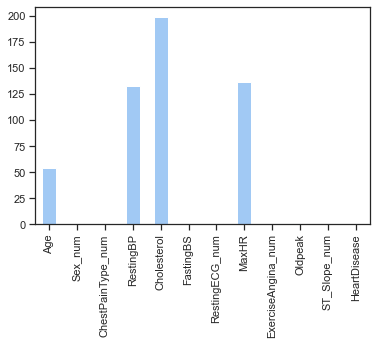

In [78]:
#BarChar
df[['Age','Sex_num','ChestPainType_num','RestingBP','Cholesterol','FastingBS','RestingECG_num','MaxHR','ExerciseAngina_num','Oldpeak','ST_Slope_num','HeartDisease']].mean().plot(kind='bar')
plt.show()

In [79]:
graph = df.groupby(by='Sex_num').mean()
graph

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_num,RestingECG_num,ExerciseAngina_num,ST_Slope_num
Sex_num,,,,,,,,,,,
0,52.492228,132.212435,241.196891,0.134715,146.139896,0.668912,0.259067,1.015544,0.901554,0.222798,1.538860
1,53.782069,132.445517,187.513103,0.259310,134.325517,0.945517,0.631724,0.718621,1.012414,0.452414,1.314483


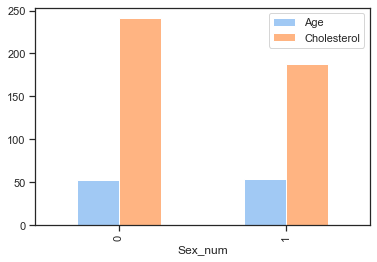

In [80]:
graph[['Age','Cholesterol']].plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

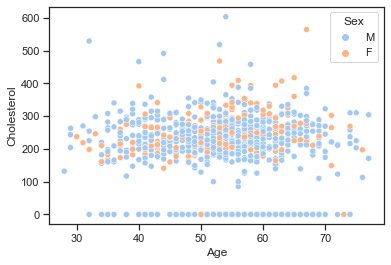

In [87]:
sns.scatterplot(data=df, x="Age", y="Cholesterol", hue="Sex")


In [123]:
import statsmodels.formula.api as smf

# statsmodels API
modelFS = smf.ols(formula = 'HeartDisease ~  Q("Age") + Q("Sex_num") + Q("ChestPainType_num")+ Q("RestingBP") + Q("Cholesterol") + Q("FastingBS") + Q("RestingECG_num") + Q("MaxHR") + Q("ExerciseAngina_num") + Q("Oldpeak") + Q("ST_Slope_num")'  , data=df).fit()
modelFS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     86.86
Date:                Sat, 05 Mar 2022   Prob (F-statistic):          1.92e-133
Time:                        21:49:18   Log-Likelihood:                -330.50
No. Observations:                 918   AIC:                             685.0
Df Residuals:                     906   BIC:                             742.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.8093      0.148      5.468      0.000       0.519       1.100
Q("Age")                    0.0024      0.001      1.671      0.095      -0.000       0.005
Q("Sex_num")                0.1703      0.030      5.746      0.000       0.112       0.228
Q("ChestPainType_num")     -0.0943      0.013     -7.154      0.000      -0.120      -0.068
Q("RestingBP")              0.0005      0.001      0.740      0.459      -0.001       0.002
Q("Cholesterol")           -0.0005      0.000     -4.351      0.000      -0.001      -0.000
Q("FastingBS")              0.1432      0.029      4.927      0.000       0.086       0.200
Q("RestingECG_num")        -0.0209      0.019     -1.103      0.270      -0.058       0.016
Q("MaxHR")                 -0.0016      0.001     -2.788      0.005      -0.003      -0.000
Q("ExerciseAngina_num")     0.1857      0.029      6.391      0.000       0.129       0.243
Q("Oldpeak")                0.0496      0.013      3.743      0.000       0.024       0.076
Q("ST_Slope_num")          -0.2398      0.024    -10.001      0.000      -0.287      -0.193
==============================================================================
Omnibus:                        4.499   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.794
Skew:                          -0.098   Prob(JB):                       0.0910
Kurtosis:                       3.295   Cond. No.                     3.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
#Lets check p-values 
modelFS.pvalues.sort_values(ascending=True)

Q("ST_Slope_num")          2.075163e-22
Q("ChestPainType_num")     1.737723e-12
Q("ExerciseAngina_num")    2.641106e-10
Q("Sex_num")               1.244364e-08
Intercept                  5.873679e-08
Q("FastingBS")             9.921010e-07
Q("Cholesterol")           1.512281e-05
Q("Oldpeak")               1.931608e-04
Q("MaxHR")                 5.422555e-03
Q("Age")                   9.502131e-02
Q("RestingECG_num")        2.703869e-01
Q("RestingBP")             4.593987e-01
dtype: float64

# Feature Selections
In this section we going to chose the features most relevant to implement the model, the porpouse is reduce the dimensionality of the data set.

In [131]:
X = df[['Age','Sex_num','ChestPainType_num','RestingBP','Cholesterol','FastingBS','RestingECG_num','MaxHR','ExerciseAngina_num','Oldpeak','ST_Slope_num']]
#X
y = df['HeartDisease']
print(X.shape)
y.shape

(918, 11)


(918,)

In [129]:
fi = pd.DataFrame({'Feature': list(X.columns),
                  'P-Value': modelo_FS.feature_importances_}).sort_values('P-Value', ascending=False)
fi

,Feature,P-Value
10,ST_Slope_num,0.235082
2,ChestPainType_num,0.134807
9,Oldpeak,0.112043
4,Cholesterol,0.107599
7,MaxHR,0.104846
0,Age,0.077039
8,ExerciseAngina_num,0.073619
3,RestingBP,0.069714
1,Sex_num,0.034005
6,RestingECG_num,0.027834


# Random Forest Classifier


In [127]:
#Model definition
modelo_FS = RandomForestClassifier(random_state=0)

#Train model 
modelo_FS.fit(X,y)

RandomForestClassifier(random_state=0)

In [132]:
print('Accuracy =', modelo_FS.score(X,y))

Accuracy = 1.0


# Logistic Regresion


In [146]:
#we see that there is a class imbalance
print("\n=====Basic statistics:=====\n")
print(df.describe().transpose())


=====Basic statistics:=====

                    count        mean         std   min     25%    50%    75%  \
Age                 918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   
RestingBP           918.0  132.396514   18.514154   0.0  120.00  130.0  140.0   
Cholesterol         918.0  198.799564  109.384145   0.0  173.25  223.0  267.0   
FastingBS           918.0    0.233115    0.423046   0.0    0.00    0.0    0.0   
MaxHR               918.0  136.809368   25.460334  60.0  120.00  138.0  156.0   
Oldpeak             918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5   
HeartDisease        918.0    0.553377    0.497414   0.0    0.00    1.0    1.0   
Sex_num             918.0    0.789760    0.407701   0.0    1.00    1.0    1.0   
ChestPainType_num   918.0    0.781046    0.956519   0.0    0.00    0.0    2.0   
RestingECG_num      918.0    0.989107    0.631671   0.0    1.00    1.0    1.0   
ExerciseAngina_num  918.0    0.404139    0.490992   0.0    0.00    0.0    1.0  

# Standarize Data

In [148]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_num,ChestPainType_num,RestingECG_num,ExerciseAngina_num,ST_Slope_num
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,2,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2,1,0,2


In [161]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
df[['Age', 'ChestPainType_num','RestingBP','Cholesterol','MaxHR','Oldpeak','ST_Slope_num']] = std_scaler.fit_transform(df[['Age', 'ChestPainType_num','RestingBP','Cholesterol','MaxHR','Oldpeak','ST_Slope_num']])

print("\nTransformed Dataset:")
print(df)


Transformed Dataset:
          Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   -1.433140   M           ATA   0.410909     0.825070          0     Normal   
1   -0.478484   F           NAP   1.491752    -0.171961          0     Normal   
2   -1.751359   M           ATA  -0.129513     0.770188          0         ST   
3   -0.584556   F           ASY   0.302825     0.139040          0     Normal   
4    0.051881   M           NAP   0.951331    -0.034755          0     Normal   
..        ...  ..           ...        ...          ...        ...        ...   
913 -0.902775   M            TA  -1.210356     0.596393          0     Normal   
914  1.536902   M           ASY   0.627078    -0.053049          1     Normal   
915  0.370100   M           ASY  -0.129513    -0.620168          0     Normal   
916  0.370100   F           ATA  -0.129513     0.340275          0        LVH   
917 -1.645286   M           NAP   0.302825    -0.217696          0     Normal   

     

In [160]:
from sklearn.feature_selection import SelectKBest, f_regression

NUMBER_FEATURES = 10

#Split X and Y
Y = df['HeartDisease']
X = df.drop(['HeartDisease'], axis=1)

selector = SelectKBest(f_regression, k=NUMBER_FEATURES)
selector.fit(X, Y)


# print("\nFeatures selected:\n")
# print(selector.get_support())

# print("\nName of features selected :\n")
# print(X.columns[selector.get_support().ravel().tolist()])

# #Set X_new column names
# cols = selector.get_support(indices=True)
# X_new = X.iloc[:,cols]

# #Set y column names
# Y = pd.DataFrame(Y)
# Y.columns = ['HeartDesease']

# print("\nNew X dataset:\n")
# print(X_new[:NUMBER_FEATURES])

ValueError: could not convert string to float: 'M'

# Handling class imbalance for variable
One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

In [136]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_smotenn, y_smotenn = smote_enn.fit_resample(X,y)


print('Size of X before  SMOTEENN:', X.shape)
print('Size of X after SMOTEENN:', X_smotenn.shape)
print('Balance: \n', y_smotenn.value_counts())
#Now the observations seems with a better balance.

Size of X before  SMOTEENN: (918, 2)
Size of X after SMOTEENN: (732, 2)
Balance: 
 0    386
1    346
Name: HeartDisease, dtype: int64


In [138]:
#Separamos los datos en entrenamiento y test
#El 0.2 se refiere a que los de test sean 20%
#El random state es una semilla aleatoria, poner siempre 0 por practicidad, aunque puedo poner cualquier número
#Stratify garantiza que se mantenga la proporción de clases, mantiene en este caso el desbalance.

X_train, X_test, y_train, y_test = train_test_split(X_smotenn, y_smotenn, test_size=0.2, random_state=0, stratify=y_smotenn)

#Observemos el tamaño de los datos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((585, 2), (147, 2), (585,), (147,))

In [115]:
pd.value_counts(y_train)

0    308
1    277
Name: HeartDisease, dtype: int64

In [139]:
#Definimos el modelo
modelo1 = LogisticRegression(random_state=0, class_weight='balanced')

#Entrenamos el modelo
modelo1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [140]:
#Hagamos predicciones
y_pred1 = modelo1.predict(X_test)
print(y_pred1[0:5])
y_test.head()

[1 1 0 0 1]


451    1
595    1
288    0
348    0
691    1
Name: HeartDisease, dtype: int64

In [143]:
y_pred_proba = modelo1.predict_proba(X_test)
y_pred_proba[0:5]

array([[0.02154893, 0.97845107],
       [0.16083159, 0.83916841],
       [0.98855665, 0.01144335],
       [0.98855665, 0.01144335],
       [0.16083159, 0.83916841]])

In [144]:
#Evaluemos el modelo
#Veamos los Accuracy de train y test
Accuracy_train = modelo1.score(X_train,y_train)
print('Accuracy train =', Accuracy_train)
Accuracy_test = modelo1.score(X_test, y_test)
print('Accuracy test =', Accuracy_test)
print('Diferencia = ', np.abs(Accuracy_train-Accuracy_test))

Accuracy train = 1.0
Accuracy test = 1.0
Diferencia =  0.0


In [142]:
#Evaluemos con la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

#0 = No tiene enfermedad cardiaca
#1 = Sí tiene enfermedad cardiaca

array([[78,  0],
       [ 0, 69]], dtype=int64)

In [162]:
from sklearn import preprocessing

In [174]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']